# Modul 0 - Bruk av JupyterLab til øvelser 
I kurset skal vi etterhvert bruke en enkel klimamodell, en toboksmodell, for å beregne temperaturresponser på ulike faktorer. Vi skal både bruke fortidsdata som er basert på observasjoner, og fremtidsdata som er basert på de større klimamodellene. 

I denne modulen skal du trene på å hente inn data som ligger i en csv-fil, og så bruke kommandoer fra biblioteket `pandas` til å hente ut informasjon fra de dataene som ligger i filen. Pandas gjør det enkelt å lage finere plot, og å hente ut spesifikke data fra datafilen, selv om datamengden er stor. 

In [2]:
import pandas as pd # importerer pandas og bruker forkortelsen pd
import matplotlib.pyplot as plt # importerer bibliotek som gjør at man kan lage plott liknende MatLab

df=pd.read_csv('historical.csv',index_col = 0,sep=',',encoding = "utf-8") 

# Visualisér dine data
Du kan visualisere det data som du netop har lastet inn ved at taste inn navnet på din dataframe (i.e. <b>df</b>)

In [3]:
df

,drivhusgasser,solinnstråling,vulkanisme,arealbruk,aerosoler
År,,,,,
1751.0,-0.019,-0.014,0.000,0.000,-0.002
1752.0,-0.018,-0.029,0.000,-0.001,-0.004
1753.0,-0.017,-0.033,0.000,-0.001,-0.005
1754.0,-0.017,-0.043,0.000,-0.002,-0.007
1755.0,-0.016,-0.054,-0.664,-0.002,-0.009
...,...,...,...,...,...
2007.0,2.697,-0.017,-0.100,-0.150,-0.907
2008.0,2.728,-0.025,-0.100,-0.150,-0.904
2009.0,2.761,-0.027,-0.125,-0.150,-0.902


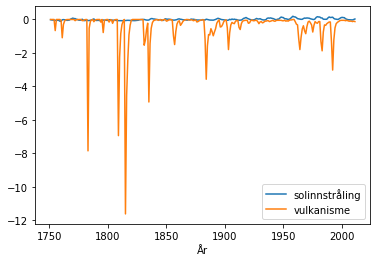

In [10]:
df.index=df.index.astype(int) # årstallene lastes inn som flyttall - her endres de til heltall
df[['solinnstråling','vulkanisme']].plot() # her lager vi plot fra de dataene som finnes i datafilen, vi har ikke gjort noen beregninger

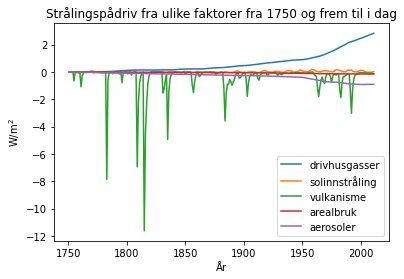

In [3]:
df.plot(ylabel="W/m$^2$",title="Strålingspådriv fra ulike faktorer fra 1750 og frem til i dag")
# her har vi lagt til litt mer informasjon til selve plottet, men fortsatt ingen beregninger

## Hente spesifikke data
Noen ganger ønsker vi å se på verdier fra spesifikke år. Årstallene fungerer som index i datarammen vi har laget med dataene. Vi kan derfor hente ut verdiene fra de ulike årstallene som vist under. Denne metoden vil dere få bruk for i oppgavene senere. Test gjerne ut med ulike årstall. 
`df.loc[årstall]`

In [ ]:
df.loc[1900]

In [ ]:
df.loc[1900,'solinnstråling']

### Lete etter verdier
Vi har også mulighet til å lete etter bestemte verdier eller intervaller. Under vises en måte å hente ut data for når pådrivet fra vulkaner er mindre enn $-4 W/m^2$. 

In [ ]:
df.loc[df['vulkanisme']<-4]

Vi kan også velge å bare vise den kolonnen som vi er interessert i:

In [ ]:
df.loc[df['vulkanisme']<-4,'vulkanisme']

## Hvilke faktorer ønsker du å ta med i beregningene?
Noen ganger så ønsker man bare å studere effektene av eksempelvis solens aktivitet. Sett parameterne under til 1 eller 0, alt ettersom du ønsker å ha dem med eller ei. I koden under lages en ny dataramme som inneholder totalt pådriv med disse faktorene.

In [58]:
# --------------------
# Forcing switches [n=1 off=0]
# --------------------
switch_ghg=0     # Greenhouse gas forcing on=1 off=0
switch_solar=1   # Solar forcing on=1 off=0
switch_volc=0    # Volcanic forcing on=1 off=0
switch_land=0    # Landuse forcing on=1 off=0
switch_aero=0    # Pollution particle forcing on=1 off=0

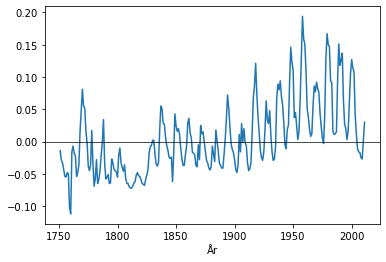

In [59]:
total_forcing = switch_ghg*df['drivhusgasser']+switch_solar*df['solinnstråling']+switch_volc*df['vulkanisme']+switch_land*df['arealbruk']+switch_aero*df['aerosoler']
total_forcing.plot()
plt.axhline(y=0, linewidth=0.7, color="black")

## Veien videre
Senere skal vi bruke disse dataene til å si noe om temperaturresponsen i klimasystemet basert på de ulike drivkreftene. Vi skal bruke en enkel klimamodell for å kunne studere hvordan de ulike faktorene påvirker temperaturen i atmosfæren.

# Beregne middelsværdier og sum

In [47]:
# oprett simpel dataframe for test
data = [[1, 1, 2], [6, 4, 2], [4, 2, 1], [4, 2, 3]]

A = pd.DataFrame(data)

# Beregn middelsverdi langs rekker
print(A.mean())

# Tilsvarende ka vi også beregne summen via funktionen "df.sum()"
print(A.sum())

0    3.75
1    2.25
2    2.00
dtype: float64
0    15
1     9
2     8
dtype: int64


Som default beregnes middelsværdien langs den 1. dimension av dataframe (langs rekker). Om du vil beregne værdien langs kolonner istedet må du definere dette:

In [48]:
# middelsværdi langs kolonner
print(A.mean(axis='columns'))

# sum langs kolonner
print(A.sum(axis='columns'))

0    1.333333
1    4.000000
2    2.333333
3    3.000000
dtype: float64
0     4
1    12
2     7
3     9
dtype: int64


## Beregne middelsværdier av strålingsdata 
Prøv nu å beregne middelsværdien for 
1. hele tidsperioden (år 1750-2011) for hver strålingspådriv (*drivhusgasser, solinnstråling, vulkanisme, arealbruk, aerosoler*)  
2. det totale strålingspådriv, men for hvert årstall 

In [35]:
print(df.mean())

print(df.mean(axis='columns'))

drivhusgasser     0.643103
solinnstråling    0.005862
vulkanisme       -0.405923
arealbruk        -0.063475
aerosoler        -0.314153
dtype: float64
År
1751   -0.0070
1752   -0.0104
1753   -0.0112
1754   -0.0138
1755   -0.1490
         ...  
2007    0.3046
2008    0.3098
2009    0.3114
2010    0.3290
2011    0.3372
Length: 261, dtype: float64


## Beregne middelværdier over en bestemt periode

For at få utt værdier over en bestemt periode (eller for en bestemt variabel) kan vi benytte funktionen *loc*, som vi brukte tidligere


In [49]:
df1800_1900 = df.loc[1800:1900] # for år 1800-1900
df1900_2000 = df.loc[1900:2000] # for år 1900-2000

print(df1800_1900)


      drivhusgasser  solinnstråling  vulkanisme  arealbruk  aerosoler
År                                                                   
1800          0.113          -0.055       0.000     -0.020     -0.089
1801          0.118          -0.021      -0.154     -0.020     -0.091
1802          0.122          -0.010      -0.048     -0.021     -0.093
1803          0.125          -0.033      -0.011     -0.021     -0.095
1804          0.129          -0.040      -0.230     -0.022     -0.096
...             ...             ...         ...        ...        ...
1896          0.442           0.023      -0.450     -0.058     -0.259
1897          0.447          -0.003      -0.425     -0.058     -0.261
1898          0.450          -0.012      -0.300     -0.059     -0.262
1899          0.452          -0.017      -0.125     -0.059     -0.264
1900          0.456          -0.028      -0.050     -0.060     -0.266

[101 rows x 5 columns]


## Øvelse

Vi kan nu beregne middelsværdier for hver enkel strålingspådriv over perioden 1800-1900 og 1900-2000. Svar dernæst på følgende: 

1. Hvilken pådriv har været dominerende i perioden **før** den industrielle revolution (år 1800-1900)
2. Ser du en endring i hvilket pådriv som har været dominerende i perioden **efter** den industrielle revolution (år 1900-2000)
3. Hva er det totale (sum) strålingspådriv for de to perioder? 


In [57]:
df1800_1900_mean = df1800_1900.mean()
df1900_2000_mean = df1900_2000.mean()

print("middelsværdier over perioden 1800-1900:\n", df1800_1900_mean)
print("middelsværdier over perioden 1900-2000:\n", df1900_2000_mean)

print("Total pådriv over perioden 1800-1900:\n", df1800_1900_mean.sum())

print("Total pådriv over perioden 1900-2000:\n", df1900_2000_mean.sum())


middelsværdier over perioden 1800-1900:
 drivhusgasser     0.227099
solinnstråling   -0.019307
vulkanisme       -0.601386
arealbruk        -0.039505
aerosoler        -0.177970
dtype: float64
middelsværdier over perioden 1900-2000:
 drivhusgasser     1.138624
solinnstråling    0.046386
vulkanisme       -0.317574
arealbruk        -0.103980
aerosoler        -0.515812
dtype: float64
Total pådriv over perioden 1800-1900:
 -0.6110693069306928
Total pådriv over perioden 1900-2000:
 0.2476435643564363


# Eksempel på bar plot

Vi kan visualisere disse data med et barplot


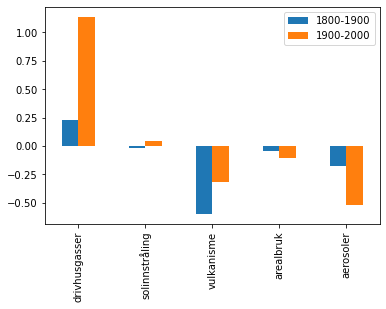

In [54]:
# definér ny dataframe mead værdiene fra 'df1800_1900_mean' og 'df1900_2000_mean'
plotdata = pd.DataFrame({
    "1800-1900":df1800_1900_mean,
    "1900-2000":df1900_2000_mean,
    }, 
)

plotdata.plot(kind="bar") # lage bar plot
